<a href="https://colab.research.google.com/github/TanayY/EDA/blob/main/Credit_EDA_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Importing the dataset:
df_application = pd.read_csv('/content/drive/MyDrive/Credit EDA Case Study/application_data.csv')
df_pr_application = pd.read_csv('/content/drive/MyDrive/Credit EDA Case Study/previous_application.csv')
column_description = pd.read_csv('/content/drive/MyDrive/Credit EDA Case Study/columns_description.csv', encoding='cp1252')

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
column_description

,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN
5,8,application_data,FLAG_OWN_REALTY,Flag if client owns a house or flat,NaN
6,9,application_data,CNT_CHILDREN,Number of children the client has,NaN
7,10,application_data,AMT_INCOME_TOTAL,Income of the client,NaN
8,11,application_data,AMT_CREDIT,Credit amount of the loan,NaN
9,12,application_data,AMT_ANNUITY,Loan annuity,NaN


In [ ]:
df_application.shape

(307511, 122)

In [ ]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
100*(df_application.isnull().sum()/307511)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [ ]:
all_cols = list(df_application.columns)

In [ ]:
todrop = []
for col in all_cols:
  null_percentage = 100*(df_application[col].isnull().sum()/307511)
  if(null_percentage>40):
    todrop.append(col)

In [ ]:
df_application[todrop].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   OWN_CAR_AGE                   104582 non-null  float64
 1   EXT_SOURCE_1                  134133 non-null  float64
 2   APARTMENTS_AVG                151450 non-null  float64
 3   BASEMENTAREA_AVG              127568 non-null  float64
 4   YEARS_BEGINEXPLUATATION_AVG   157504 non-null  float64
 5   YEARS_BUILD_AVG               103023 non-null  float64
 6   COMMONAREA_AVG                92646 non-null   float64
 7   ELEVATORS_AVG                 143620 non-null  float64
 8   ENTRANCES_AVG                 152683 non-null  float64
 9   FLOORSMAX_AVG                 154491 non-null  float64
 10  FLOORSMIN_AVG                 98869 non-null   float64
 11  LANDAREA_AVG                  124921 non-null  float64
 12  LIVINGAPARTMENTS_AVG          97312 non-null

In [ ]:
# All the above columns have missing values more than 40% and will not provide much insights into how the TARGET variable is influenced
# Also these values can't be imputed because we are missing a lot of data to have a suitable method for imputation
# These values will therefore be dropped

df_application.drop(todrop, axis = 1, inplace=True)

In [ ]:
df_application.shape

(307511, 73)

In [ ]:
## Now let's check for other columns with missing values:
100*(df_application.isnull().sum()/307511)

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

## Univariate Analysis:

### OCCUPATION_TYPE

In [ ]:
## We will start with analysisng the OCCUPATION_TYPE column which has 31% missing value
df_application[df_application['OCCUPATION_TYPE'].isnull()]['OCCUPATION_TYPE'].head()

8     NaN
11    NaN
23    NaN
28    NaN
30    NaN
Name: OCCUPATION_TYPE, dtype: object

In [ ]:
print("Non Null Values for Occupation Type:  #",df_application['OCCUPATION_TYPE'].value_counts().sum())
print("Null Values for Occupation Type:      #",df_application['OCCUPATION_TYPE'].isnull().sum())
print("Null Values after removing non null:  #",df_application['OCCUPATION_TYPE'].shape[0] - df_application['OCCUPATION_TYPE'].value_counts().sum())

Non Null Values for Occupation Type:  # 211120
Null Values for Occupation Type:      # 96391
Null Values after removing non null:  # 96391


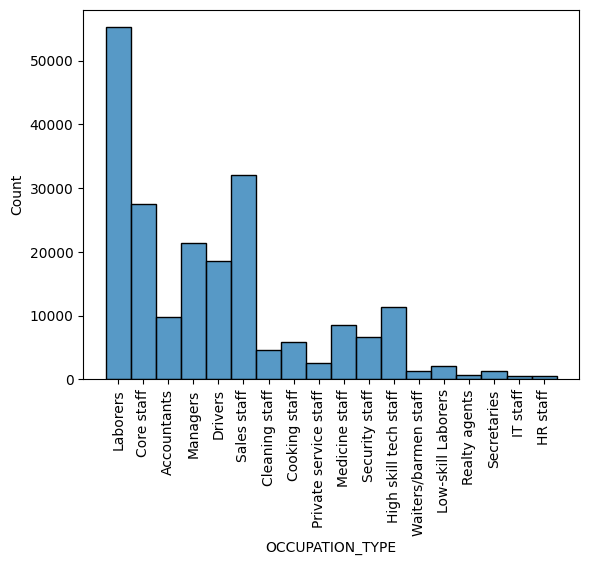

In [ ]:
sns.histplot(df_application['OCCUPATION_TYPE'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
occ_mode = df_application['OCCUPATION_TYPE'].mode()[0]
occ_mode

'Laborers'

In [ ]:
## Though we have the highest number of "Laborers" in the data OCCUPATION_TYPE column, it is still careless
## to assume that the remaining 30% of null values are "Laborers" as well. In this case we will just drop
## 30% of the rows which contain missing values of OCCUPATION_TYPE.
rows_to_drop = df_application[df_application['OCCUPATION_TYPE'].isnull()].index
df_application.drop(rows_to_drop, inplace=True)

In [ ]:
df_application.shape

(211120, 73)

In [ ]:
null_columns = df_application.columns[df_application.isna().any()].tolist()

In [ ]:
100*df_application[null_columns].isnull().sum()/(df_application.shape[0])

AMT_ANNUITY                    0.005684
AMT_GOODS_PRICE                0.104680
NAME_TYPE_SUITE                0.429613
CNT_FAM_MEMBERS                0.000947
EXT_SOURCE_2                   0.195150
EXT_SOURCE_3                  19.826165
OBS_30_CNT_SOCIAL_CIRCLE       0.329670
DEF_30_CNT_SOCIAL_CIRCLE       0.329670
OBS_60_CNT_SOCIAL_CIRCLE       0.329670
DEF_60_CNT_SOCIAL_CIRCLE       0.329670
AMT_REQ_CREDIT_BUREAU_HOUR    13.403278
AMT_REQ_CREDIT_BUREAU_DAY     13.403278
AMT_REQ_CREDIT_BUREAU_WEEK    13.403278
AMT_REQ_CREDIT_BUREAU_MON     13.403278
AMT_REQ_CREDIT_BUREAU_QRT     13.403278
AMT_REQ_CREDIT_BUREAU_YEAR    13.403278
dtype: float64

From the above list, it seems that "EXT_SOURCE_3" has the highest missing values. Let's analyse the column.

### EXT_SOURCE_3

In [ ]:
## EXT_SOURCE_3 is a numerical column.
df_application['EXT_SOURCE_3'].info()

<class 'pandas.core.series.Series'>
Int64Index: 211120 entries, 0 to 307510
Series name: EXT_SOURCE_3
Non-Null Count   Dtype  
--------------   -----  
169263 non-null  float64
dtypes: float64(1)
memory usage: 3.2 MB


*   EXT_SOURCE_3 has 211120 entries
*   Of those 169263 are non null
*   EXT_SOURCE_3 is a numerical column



In [ ]:
df_application['EXT_SOURCE_3'].describe()

count    169263.000000
mean          0.500858
std           0.195880
min           0.000527
25%           0.357293
50%           0.522697
75%           0.657784
max           0.893976
Name: EXT_SOURCE_3, dtype: float64

It is unclear what EXT_SOURCE_3 means. But from the above description, we can understand:

* Total Non null values are 169263
* Median is 0.522697
* Mean is 0.500858

<Axes: >

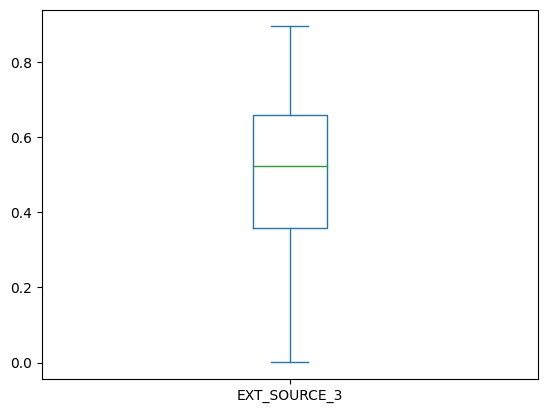

In [ ]:
df_application['EXT_SOURCE_3'].plot.box()

In [ ]:
## As we can see above, there seem to be no outliers in the column, so we will replace the missing values with mean\
df_application['EXT_SOURCE_3'].fillna(df_application['EXT_SOURCE_3'].mean(), inplace=True)

In [ ]:
df_application['EXT_SOURCE_3'].describe()

count    211120.000000
mean          0.500858
std           0.175390
min           0.000527
25%           0.401407
50%           0.500858
75%           0.626304
max           0.893976
Name: EXT_SOURCE_3, dtype: float64

Next we see that the following are missing:

* AMT_REQ_CREDIT_BUREAU_HOUR    13.403278
* AMT_REQ_CREDIT_BUREAU_DAY     13.403278
* AMT_REQ_CREDIT_BUREAU_WEEK    13.403278
* AMT_REQ_CREDIT_BUREAU_MON     13.403278
* AMT_REQ_CREDIT_BUREAU_QRT     13.403278
* AMT_REQ_CREDIT_BUREAU_YEAR    13.403278

They seem to have the same number of missing values most probably for the same entries

In [ ]:
amt_cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [ ]:
df_application[amt_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211120 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_HOUR  182823 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_DAY   182823 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_WEEK  182823 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_MON   182823 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_QRT   182823 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_YEAR  182823 non-null  float64
dtypes: float64(6)
memory usage: 11.3 MB


In [ ]:
for i in amt_cols:
  print(i)
  print(df_application[i].value_counts())
  print("___________________________________________________________________")

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    181699
1.0      1080
2.0        36
3.0         7
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64
___________________________________________________________________
AMT_REQ_CREDIT_BUREAU_DAY
0.0    181813
1.0       871
2.0        76
3.0        35
4.0        13
6.0         7
5.0         6
9.0         2
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64
___________________________________________________________________
AMT_REQ_CREDIT_BUREAU_WEEK
0.0    177037
1.0      5554
2.0       147
3.0        40
4.0        19
6.0        14
5.0         8
8.0         2
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64
___________________________________________________________________
AMT_REQ_CREDIT_BUREAU_MON
0.0     151677
1.0      23305
2.0       3986
3.0       1487
4.0        807
5.0        451
6.0        251
7.0        201
9.0        144
8.0        132
10.0       104
11.0        85
12.0        50
13.0        50
14.0        32
15.0        20
16

As we can see the maxmum occuring value in all the above 6 columns is 0. So we will replace the missing values with 0.

In [ ]:
for i in amt_cols:
  df_application[i].fillna(0, inplace=True)

In [ ]:
df_application[amt_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211120 entries, 0 to 307510
Data columns (total 6 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_REQ_CREDIT_BUREAU_HOUR  211120 non-null  float64
 1   AMT_REQ_CREDIT_BUREAU_DAY   211120 non-null  float64
 2   AMT_REQ_CREDIT_BUREAU_WEEK  211120 non-null  float64
 3   AMT_REQ_CREDIT_BUREAU_MON   211120 non-null  float64
 4   AMT_REQ_CREDIT_BUREAU_QRT   211120 non-null  float64
 5   AMT_REQ_CREDIT_BUREAU_YEAR  211120 non-null  float64
dtypes: float64(6)
memory usage: 11.3 MB


In [ ]:
100*df_application[null_columns].isnull().sum()/(df_application.shape[0])

AMT_ANNUITY                   0.005684
AMT_GOODS_PRICE               0.104680
NAME_TYPE_SUITE               0.429613
CNT_FAM_MEMBERS               0.000947
EXT_SOURCE_2                  0.195150
EXT_SOURCE_3                  0.000000
OBS_30_CNT_SOCIAL_CIRCLE      0.329670
DEF_30_CNT_SOCIAL_CIRCLE      0.329670
OBS_60_CNT_SOCIAL_CIRCLE      0.329670
DEF_60_CNT_SOCIAL_CIRCLE      0.329670
AMT_REQ_CREDIT_BUREAU_HOUR    0.000000
AMT_REQ_CREDIT_BUREAU_DAY     0.000000
AMT_REQ_CREDIT_BUREAU_WEEK    0.000000
AMT_REQ_CREDIT_BUREAU_MON     0.000000
AMT_REQ_CREDIT_BUREAU_QRT     0.000000
AMT_REQ_CREDIT_BUREAU_YEAR    0.000000
dtype: float64

#### AMT_ANNUITY

In [ ]:
df_application['AMT_ANNUITY'].describe()

count    211108.000000
mean      27793.198221
std       14622.071200
min        1980.000000
25%       17077.500000
50%       25836.750000
75%       35586.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [ ]:
df_application['AMT_ANNUITY'].isnull().sum()

12

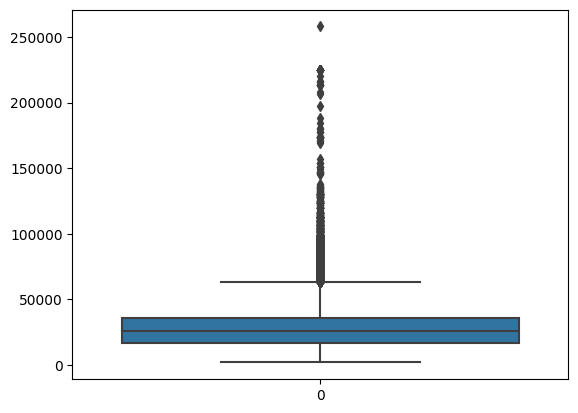

In [ ]:
### Plotting box plot for AMT_AMMUNITY to look for outliers
sns.boxplot(df_application['AMT_ANNUITY'])
plt.show()

In [ ]:
df_application[df_application['AMT_ANNUITY'] > 200000]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
12108,114122,0,Revolving loans,M,Y,Y,0,1080000.0,2250000.0,225000.0,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.072508,-15323,-6281,-2788.0,-4430,1,1,0,1,1,0,Managers,2.0,1,1,WEDNESDAY,19,0,0,0,0,0,0,Bank,0.750889,0.500858,0.0,0.0,0.0,0.0,-306.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
15501,118093,0,Revolving loans,F,Y,Y,0,270000.0,2250000.0,225000.0,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,Rented apartment,0.010006,-19672,-12615,-10406.0,-3131,1,1,0,1,0,0,High skill tech staff,2.0,2,1,SATURDAY,12,0,0,0,0,0,0,Industry: type 9,0.794677,0.667458,0.0,0.0,0.0,0.0,-308.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
17948,120926,0,Cash loans,M,Y,N,2,783000.0,4050000.0,258025.5,4050000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.009549,-15176,-201,-1529.0,-4722,1,1,1,1,0,1,Managers,4.0,2,2,THURSDAY,14,1,1,0,1,1,1,Industry: type 4,0.706927,0.553165,0.0,0.0,0.0,0.0,-5.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
20119,123467,0,Revolving loans,F,Y,Y,0,675000.0,2250000.0,225000.0,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,Rented apartment,0.032561,-16004,-795,-4578.0,-4802,1,1,0,1,0,1,Managers,2.0,1,1,TUESDAY,10,0,1,1,0,1,1,Business Entity Type 3,0.649701,0.150085,1.0,0.0,0.0,0.0,-1029.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
20338,123729,0,Cash loans,M,Y,N,0,540000.0,2303460.0,213291.0,2250000.0,Unaccompanied,Commercial associate,Higher education,Married,With parents,0.072508,-13806,-5310,-3124.0,-4399,1,1,1,1,1,0,IT staff,2.0,1,1,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 1,0.592733,0.720944,0.0,0.0,0.0,0.0,-619.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
23582,127443,0,Revolving loans,M,N,N,0,675000.0,2250000.0,225000.0,2250000.0,"Spouse, partner",Commercial associate,Higher education,Married,House / apartment,0.035792,-21040,-2228,-3377.0,-4385,1,1,0,1,0,0,Managers,2.0,2,2,SATURDAY,14,0,0,0,0,0,0,Self-employed,0.569975,0.698668,0.0,0.0,0.0,0.0,-703.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
32100,137221,0,Revolving loans,F,N,Y,1,405000.0,2250000.0,225000.0,2250000.0,Family,Commercial associate,Higher education,Married,House / apartment,0.019689,-11285,-2508,-1106.0,-1057,1,1,0,1,0,0,Accountants,3.0,2,2,THURSDAY,10,0,0,0,0,0,0,Other,0.597907,0.691021,0.0,0.0,0.0,0.0,-306.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
66528,177152,0,Revolving loans,M,Y,Y,1,1800000.0,2250000.0,225000.0,2250000.0,Unaccompanied,Commercial assoc

In [ ]:
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.500858,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.500858,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.500858,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


From the above info we can say that the outliers are valid and we can replace the missing values with the median.

We can observe that most of the values here lie in between 0 to 70000

Let's check the validity of the outliers.

In [ ]:
### Replacing missing values with the median.
df_application['AMT_ANNUITY'].fillna(df_application['AMT_ANNUITY'].median(), inplace=True)
df_application['AMT_ANNUITY'].isnull().sum()

0

#### AMT_GOODS_PRICE

For consumer loans it is the price of the goods for which the loan is given

In [ ]:
df_application['AMT_GOODS_PRICE'].describe()

count    2.108990e+05
mean     5.481799e+05
std      3.723453e+05
min      4.050000e+04
25%      2.475000e+05
50%      4.500000e+05
75%      6.885000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [ ]:
df_application['AMT_GOODS_PRICE'].info()

<class 'pandas.core.series.Series'>
Int64Index: 211120 entries, 0 to 307510
Series name: AMT_GOODS_PRICE
Non-Null Count   Dtype  
--------------   -----  
210899 non-null  float64
dtypes: float64(1)
memory usage: 11.3 MB


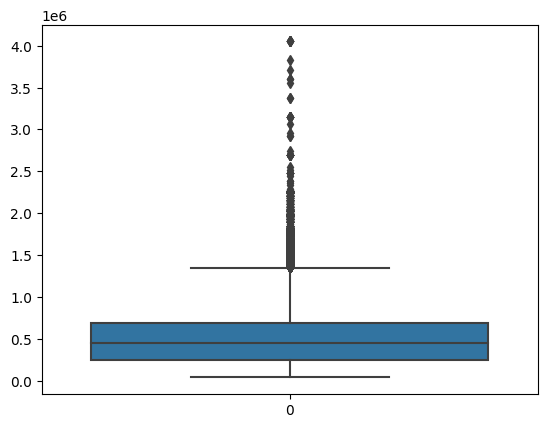

In [ ]:
sns.boxplot(df_application['AMT_GOODS_PRICE'])
plt.show()

In [ ]:
df_application['AMT_GOODS_PRICE'].mean()

548179.850008772

In [ ]:
## We will replace the missing values with the median
df_application['AMT_GOODS_PRICE'].fillna(df_application['AMT_GOODS_PRICE'].median(), inplace=True)
df_application['AMT_GOODS_PRICE'].isnull().sum()

0

#### NAME_TYPE_SUITE


In [ ]:
df_application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      171484
Family              26659
Spouse, partner      8144
Children             1878
Other_B              1245
Other_A               618
Group of people       185
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
df_application['NAME_TYPE_SUITE'].info()

<class 'pandas.core.series.Series'>
Int64Index: 211120 entries, 0 to 307510
Series name: NAME_TYPE_SUITE
Non-Null Count   Dtype 
--------------   ----- 
210213 non-null  object
dtypes: object(1)
memory usage: 11.3+ MB


In [ ]:
df_application['NAME_TYPE_SUITE'].isnull().sum()

907

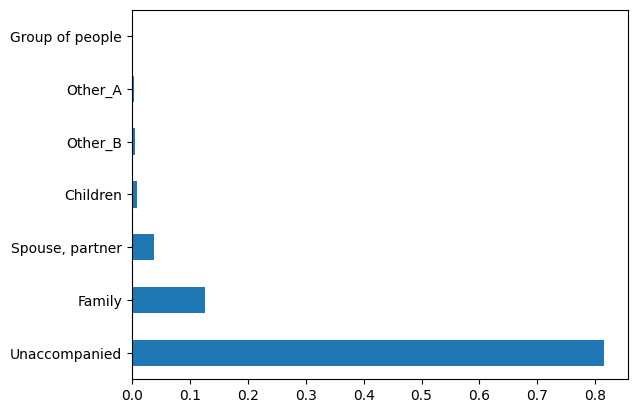

In [ ]:
df_application['NAME_TYPE_SUITE'].value_counts(normalize=True).plot.barh()
plt.show()

In [ ]:
## We will replcae the null values with 'Unaccompained' as it is the most occuring value:
df_application['NAME_TYPE_SUITE'].fillna('Unaccompanied', inplace=True)
df_application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      172391
Family              26659
Spouse, partner      8144
Children             1878
Other_B              1245
Other_A               618
Group of people       185
Name: NAME_TYPE_SUITE, dtype: int64

In [ ]:
df_application['NAME_TYPE_SUITE'].isnull().sum()

0

#### CNT_FAM_MEMBERS

In [ ]:
df_application['CNT_FAM_MEMBERS'].describe()

count    211118.000000
mean          2.260707
std           0.941193
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [ ]:
df_application['CNT_FAM_MEMBERS'].info()

<class 'pandas.core.series.Series'>
Int64Index: 211120 entries, 0 to 307510
Series name: CNT_FAM_MEMBERS
Non-Null Count   Dtype  
--------------   -----  
211118 non-null  float64
dtypes: float64(1)
memory usage: 11.3 MB


In [ ]:
## This is a continous numerical feature, we can replace the missing values with median
df_application['CNT_FAM_MEMBERS'].median()

2.0

In [ ]:
df_application['CNT_FAM_MEMBERS'].fillna(df_application['CNT_FAM_MEMBERS'].median(), inplace=True)
df_application['CNT_FAM_MEMBERS'].isnull().sum()

0

#### EXT_SOURCE_2

In [ ]:
df_application['EXT_SOURCE_2'].describe()

count    2.107080e+05
mean     5.156045e-01
std      1.898690e-01
min      8.173617e-08
25%      3.975931e-01
50%      5.664851e-01
75%      6.630799e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

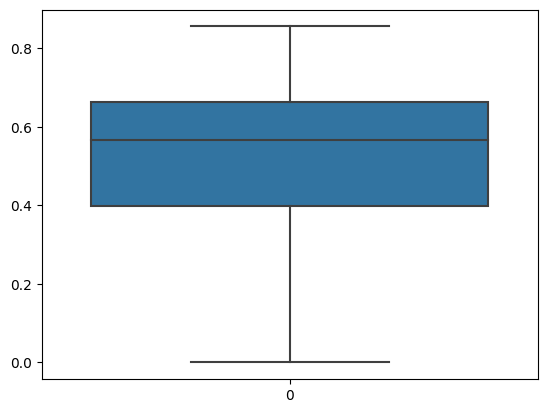

In [ ]:
sns.boxplot(df_application['EXT_SOURCE_2'])
plt.show()

In [ ]:
### There are no outliers, we can replace the missing values with the mean
df_application['EXT_SOURCE_2'].fillna(df_application['EXT_SOURCE_2'].mean(), inplace=True)
df_application['EXT_SOURCE_2'].isnull().sum()

0

#### Finding the list of columns which are not useful in the analysis.


In [ ]:
not_useful = ['OBS_30_CNT_SOCIAL_CIRCLE',
              'DEF_30_CNT_SOCIAL_CIRCLE',
              'OBS_60_CNT_SOCIAL_CIRCLE',
              'DEF_60_CNT_SOCIAL_CIRCLE',
              'DAYS_REGISTRATION',
              'FLAG_MOBIL',
              'FLAG_EMP_PHONE',
              'FLAG_WORK_PHONE',
              'FLAG_PHONE',
              'FLAG_EMAIL',
              'FLAG_CONT_MOBILE',
              'WEEKDAY_APPR_PROCESS_START',
              'HOUR_APPR_PROCESS_START',
              'LIVE_REGION_NOT_WORK_REGION',
              'REG_CITY_NOT_LIVE_CITY',
              'REG_REGION_NOT_LIVE_REGION',
              'REG_REGION_NOT_WORK_REGION',
              'REG_CITY_NOT_WORK_CITY',
              'LIVE_CITY_NOT_WORK_CITY',
              'DAYS_LAST_PHONE_CHANGE',
              'NAME_TYPE_SUITE']

In [ ]:
df_application.drop(not_useful, axis=1, inplace=True)

In [ ]:
df_application.shape

(211120, 52)

In [ ]:
df_application.isnull().sum()

SK_ID_CURR                     0
TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_BIRTH                     0
DAYS_EMPLOYED                  0
DAYS_ID_PUBLISH                0
OCCUPATION_TYPE                0
CNT_FAM_MEMBERS                0
REGION_RATING_CLIENT           0
REGION_RATING_CLIENT_W_CITY    0
ORGANIZATION_TYPE              0
EXT_SOURCE_2                   0
EXT_SOURCE_3                   0
FLAG_DOCUMENT_2                0
FLAG_DOCUMENT_3                0
FLAG_DOCUMENT_4                0
FLAG_DOCUMENT_5                0
FLAG_DOCUM

We can see that all null values have been removed from the colmns. We can move on to Bivariate

Now lets check for any imbalances in the data:


#### DAYS_BIRTH, DAYS_EMPLOYED & DAYS_ID_PUBLISH

In [ ]:
df_application[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH']].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH
count,211120.000000,211120.000000,211120.000000
mean,-14763.481778,-2373.976610,-2804.761486
std,3643.724281,2593.657192,1515.406698
min,-25200.000000,-17912.000000,-7197.000000
25%,-17541.000000,-3164.000000,-4181.000000
50%,-14574.500000,-1641.000000,-2892.000000
75%,-11789.000000,-767.000000,-1492.000000
max,-7489.000000,365243.000000,0.000000


From the above description we can note that the above values are in terms of days and are negative.
<br>
We will be converting these days to years

In [ ]:
df_application['AGE'] = (abs(df_application['DAYS_BIRTH'])//365).astype(int)
df_application['AGE'].describe()

count    211120.000000
mean         39.947627
std           9.981301
min          20.000000
25%          32.000000
50%          39.000000
75%          48.000000
max          69.000000
Name: AGE, dtype: float64

In [ ]:
## Similralry we will do this for days_employed and days_id_publish
df_application['YEARS_EMPLOYED'] = abs(df_application['DAYS_EMPLOYED']//365).astype(int)
df_application['YEARS_ID_PUBLISH'] = abs(df_application['DAYS_ID_PUBLISH']//365).astype(int)

In [ ]:
## Dropping the DAYS_BIRTH, DAYS_EMPLOYED & DAYS_ID_PUBLISH columns

df_application.drop(['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH'], axis=1, inplace=True)

#### Code Gender

In [ ]:
df_application['CODE_GENDER'].value_counts()

F      129282
M       81836
XNA         2
Name: CODE_GENDER, dtype: int64

In [ ]:
df_application = df_application[~(df_application['CODE_GENDER']=='XNA')]

#### Flag Doc

In [ ]:
flags = ['FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

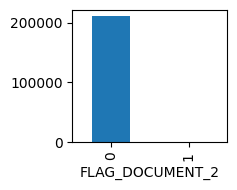

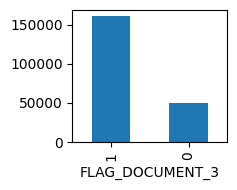

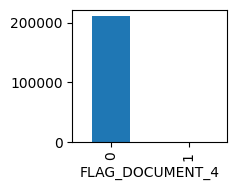

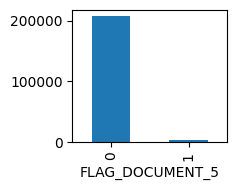

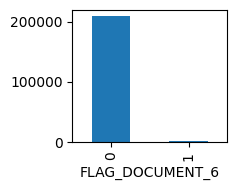

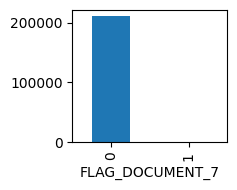

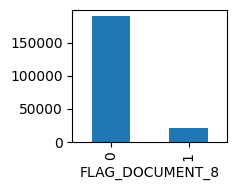

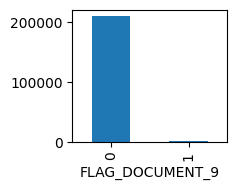

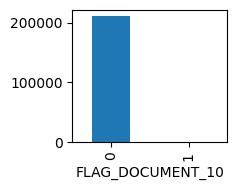

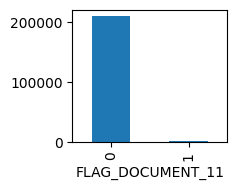

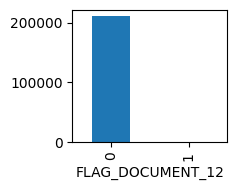

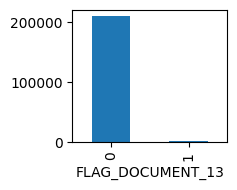

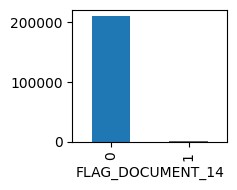

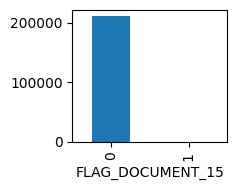

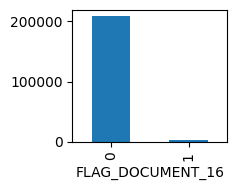

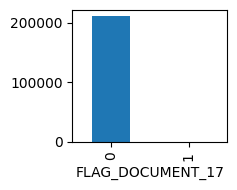

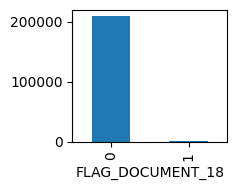

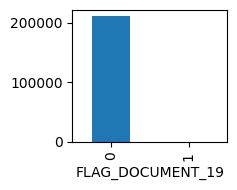

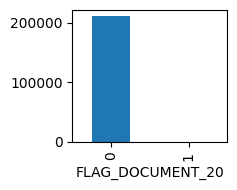

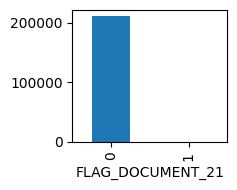

In [ ]:
# We will check data count for all Documents which are submitted by the applicant
# helping us identify the documents that are mostly required
k = 0
for i in flags:
    k = k+1
    plt.figure(figsize=(14,12))
    plt.subplot(6,6,k)
    ax = df_application[i].value_counts().plot(kind='bar')
    plt.xlabel(i)
    plt.show()

It seems only Flag Document 3 has records with the value 1.

In [ ]:
flags.remove('FLAG_DOCUMENT_3')

In [ ]:
df_application.drop(flags, axis=1 ,inplace=True)

#### Unordered Categorical Values

In [ ]:
# Fetching all the categorical cols
cat_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_FAMILY_STATUS']

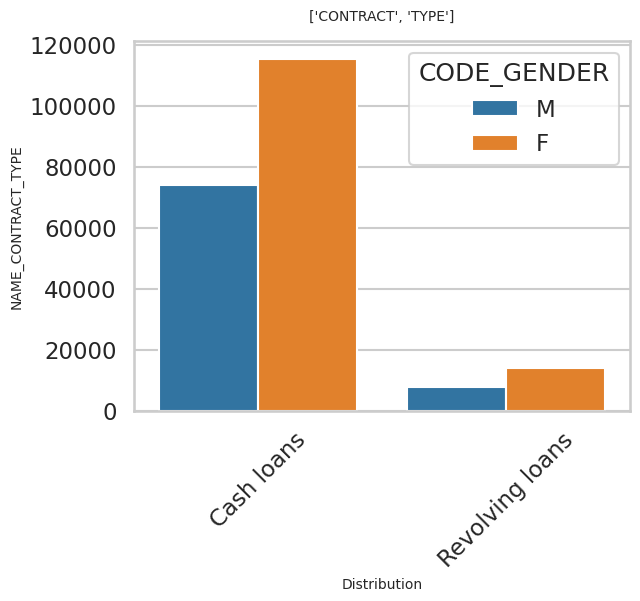

Cash loans         0.9
Revolving loans    0.1
Name: NAME_CONTRACT_TYPE, dtype: float64
------------------ 



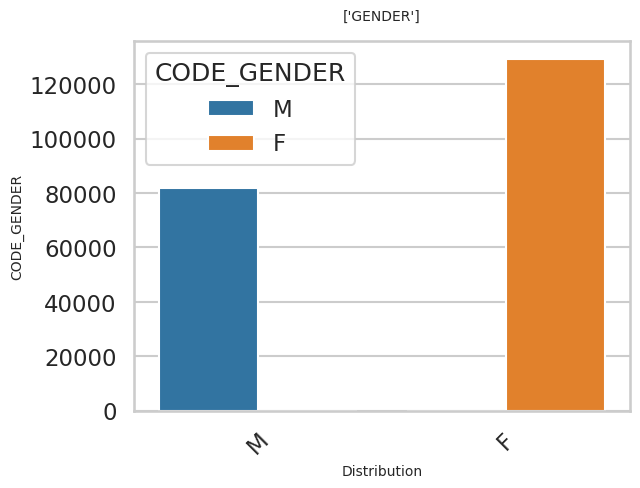

F    0.61
M    0.39
Name: CODE_GENDER, dtype: float64
------------------ 



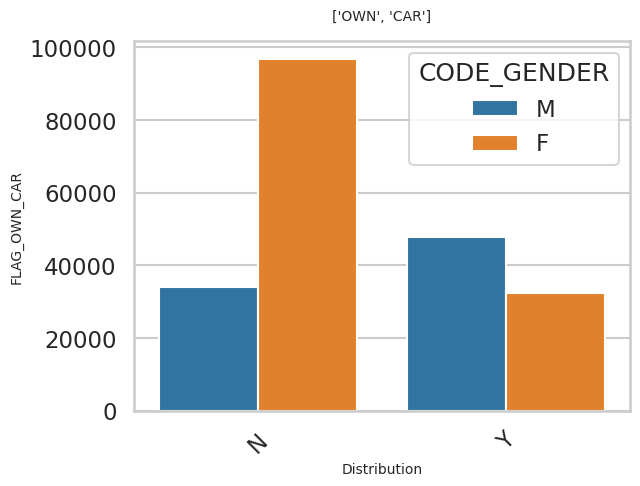

N    0.62
Y    0.38
Name: FLAG_OWN_CAR, dtype: float64
------------------ 



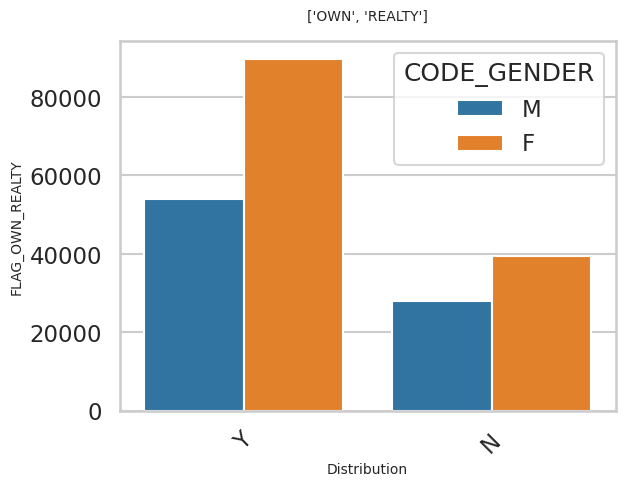

Y    0.68
N    0.32
Name: FLAG_OWN_REALTY, dtype: float64
------------------ 



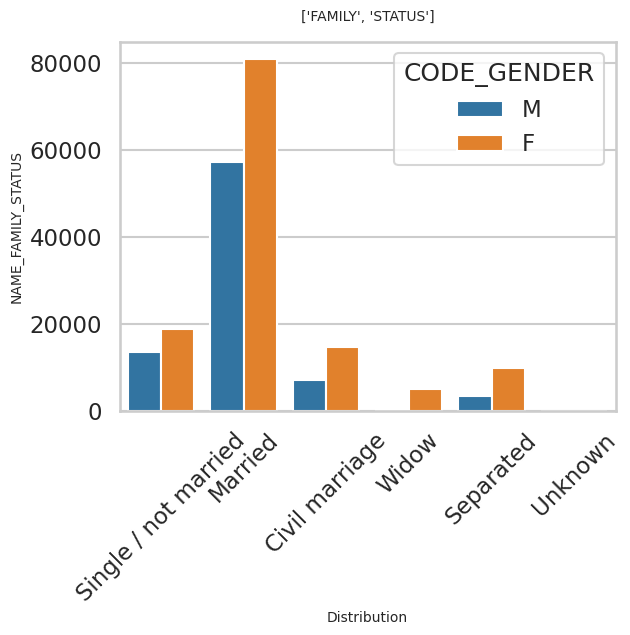

Married                 0.65
Single / not married    0.15
Civil marriage          0.10
Separated               0.06
Widow                   0.03
Unknown                 0.00
Name: NAME_FAMILY_STATUS, dtype: float64
------------------ 



In [ ]:
for i in cat_cols:
    # print(df_application[i].value_counts(normalize=True).plot.bar())
    sns.countplot(data=df_application, x = i, hue="CODE_GENDER")
    plt.title(i.split('_')[1:])
    plt.ylabel(i)
    plt.xlabel('Distribution')
    plt.xticks(rotation=45)
    plt.show()
    print(round(df_application[i].value_counts()/len(df_application[i]),2))
    print('------------------','\n')

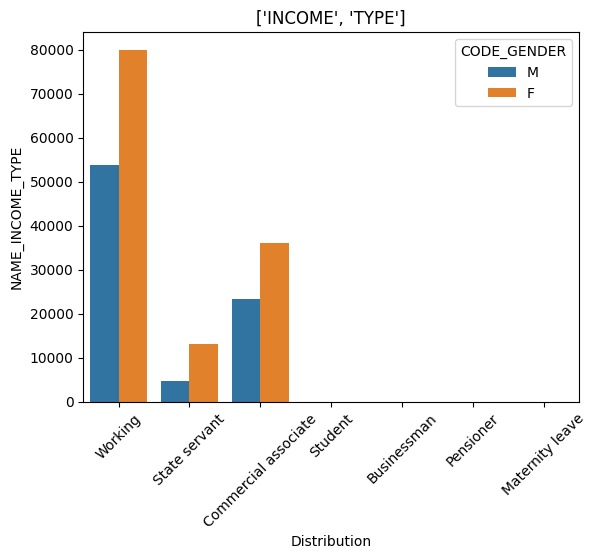

------------------ 



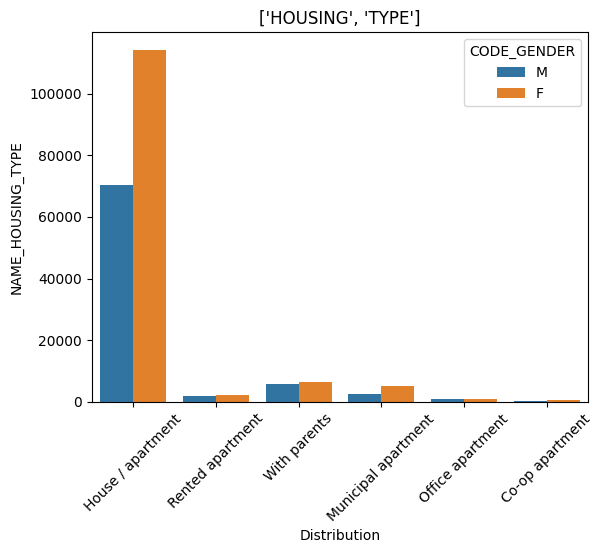

------------------ 



In [ ]:
label_cols = ['NAME_INCOME_TYPE','NAME_HOUSING_TYPE']
for i in label_cols:
    sns.countplot(data=df_application, x = i, hue = "CODE_GENDER")
    plt.title(i.split('_')[1:])
    plt.ylabel(i)
    plt.xticks(rotation=45)
    plt.xlabel('Distribution')
    plt.show()
    print('------------------','\n')

### Bivariate analysis
We will be analyzing the target column in comaprison with the other columns

In [ ]:
# Seperating defaulters from non-defaulters
non_defaulters = df_application[df_application['TARGET']==0]
defaulters = df_application[df_application['TARGET']==1]

#### Target vs Loan Type

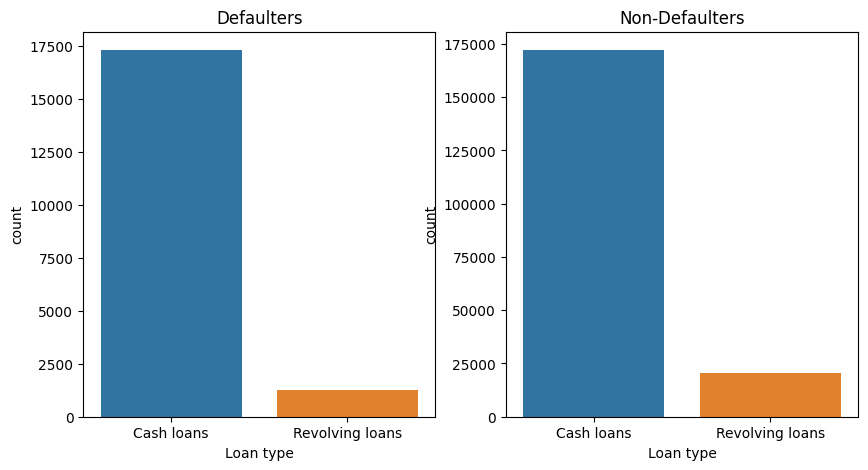

In [ ]:
# Loan Type

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
ax = sns.countplot(data=defaulters, x = 'NAME_CONTRACT_TYPE')
plt.title('Defaulters')
ax.set(xlabel='Loan type')

plt.subplot(1,2,2)
ax = sns.countplot(data=non_defaulters, x = 'NAME_CONTRACT_TYPE')
plt.title('Non-Defaulters')
ax.set(xlabel='Loan type')

plt.show()

#### Target vs Code Gender

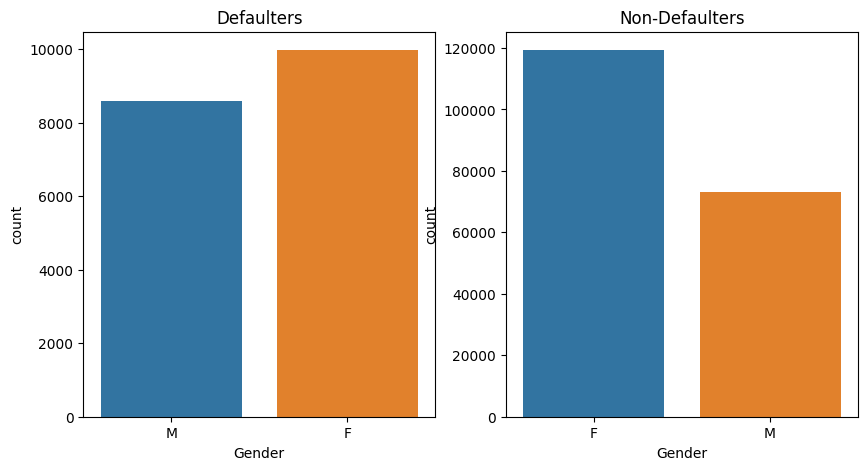

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
ax = sns.countplot(data=defaulters, x = 'CODE_GENDER')
plt.title('Defaulters')
ax.set(xlabel='Gender')

plt.subplot(1,2,2)
ax = sns.countplot(data=non_defaulters, x = 'CODE_GENDER')
plt.title('Non-Defaulters')
ax.set(xlabel='Gender')
plt.show()

#### Target vs. FLAG_OWN_CAR



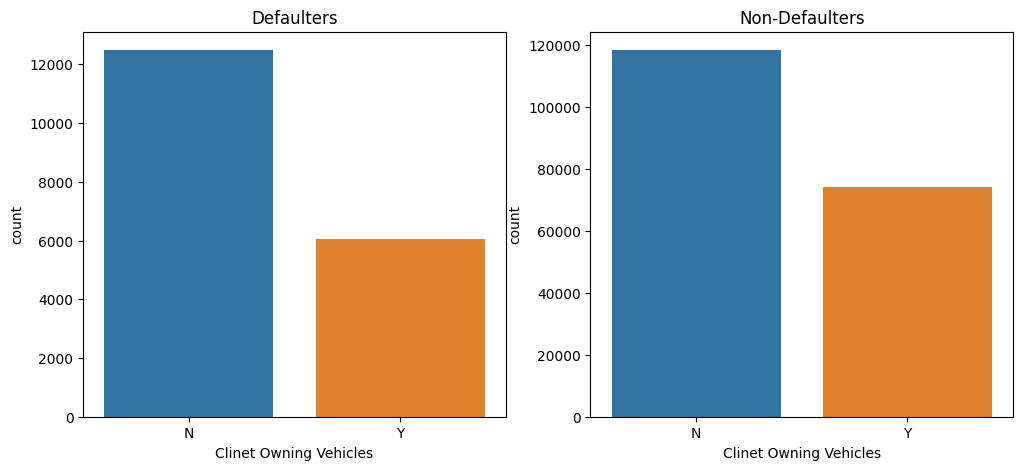

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
ax = sns.countplot(data=defaulters, x = 'FLAG_OWN_CAR')
plt.title('Defaulters')
ax.set(xlabel='Clinet Owning Vehicles')

plt.subplot(1,2,2)
ax = sns.countplot(data=non_defaulters, x = 'FLAG_OWN_CAR')
plt.title('Non-Defaulters')
ax.set(xlabel='Clinet Owning Vehicles')
plt.show()

#### Target vs. Income Type

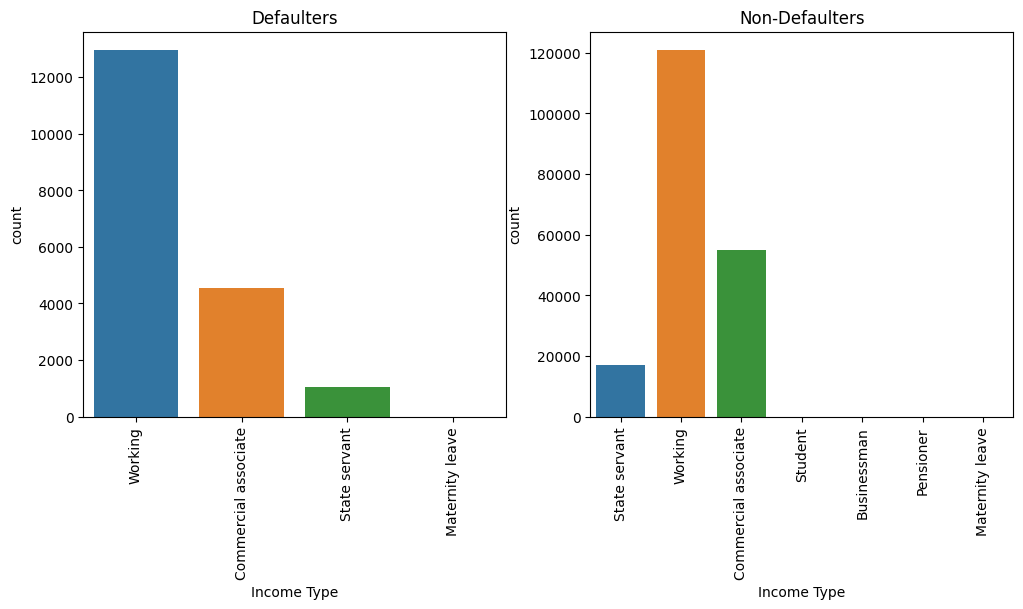

In [ ]:
# Income Type

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
ax = sns.countplot(data=defaulters,x='NAME_INCOME_TYPE')
plt.title('Defaulters')
plt.xticks(rotation=90)
ax.set(xlabel='Income Type')

plt.subplot(1,2,2)
ax = sns.countplot(data=non_defaulters, x = 'NAME_INCOME_TYPE')
plt.title('Non-Defaulters')
plt.xticks(rotation=90)
ax.set(xlabel='Income Type')
plt.show()

#### Target vs NAME_FAMILY_STATUS

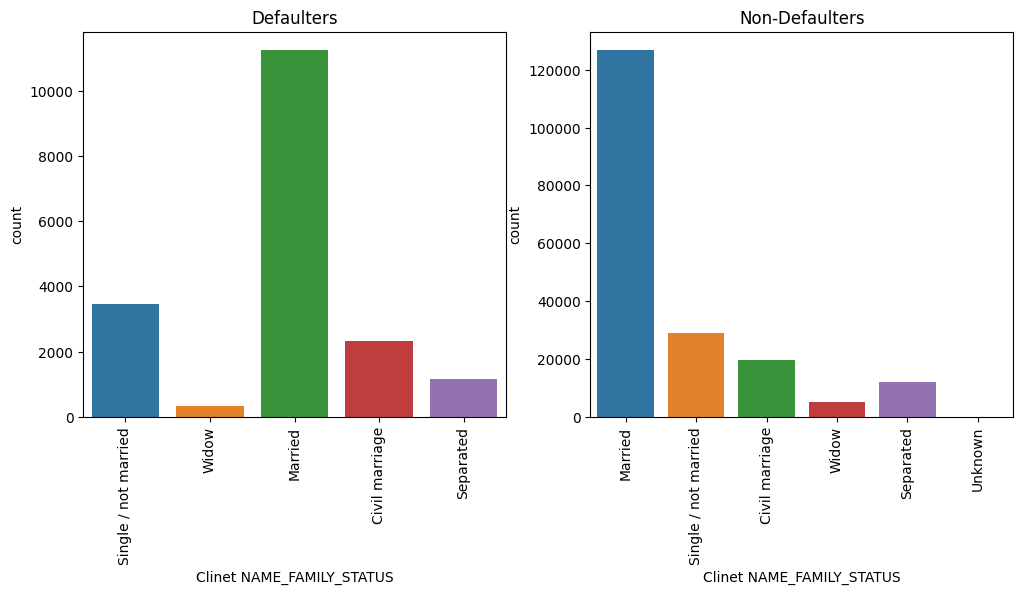

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
ax = sns.countplot(data=defaulters, x = 'NAME_FAMILY_STATUS')
plt.title('Defaulters')
ax.set(xlabel='Clinet NAME_FAMILY_STATUS')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(data=non_defaulters, x = 'NAME_FAMILY_STATUS')
plt.title('Non-Defaulters')
ax.set(xlabel='Clinet NAME_FAMILY_STATUS')
plt.xticks(rotation=90)

plt.show()

#### Target vs. NAME_HOUSING_TYPE


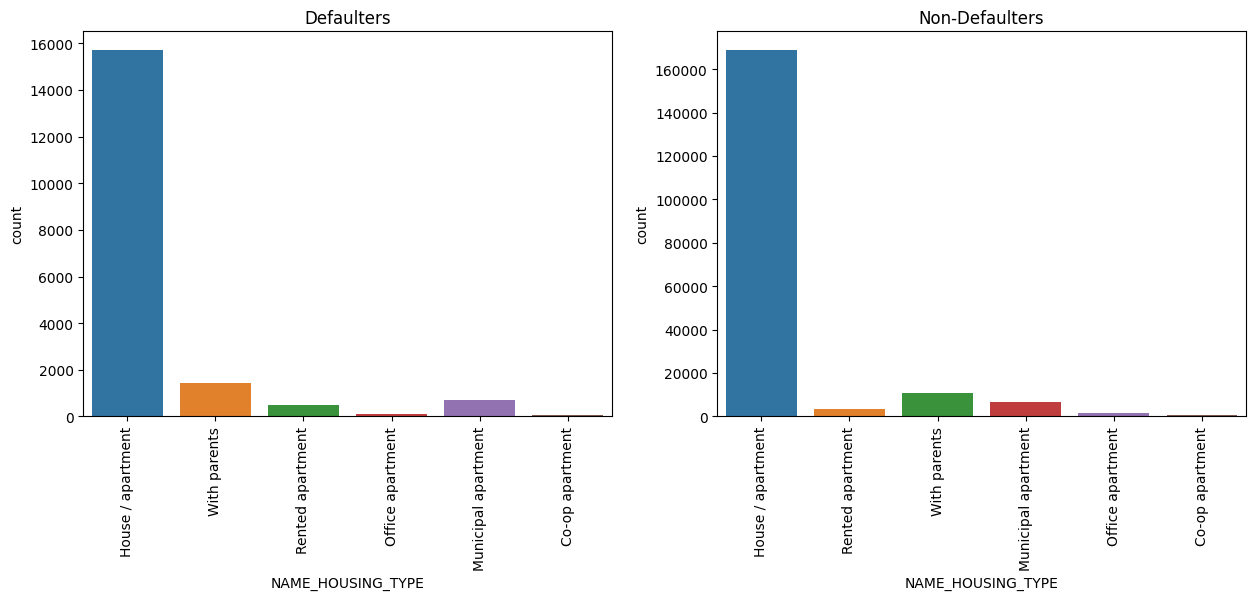

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax = sns.countplot(data=defaulters, x = 'NAME_HOUSING_TYPE')
plt.title('Defaulters')
ax.set(xlabel='NAME_HOUSING_TYPE')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(data=non_defaulters, x = 'NAME_HOUSING_TYPE')
plt.title('Non-Defaulters')
ax.set(xlabel='NAME_HOUSING_TYPE')
plt.xticks(rotation=90)
plt.show()

#### Target vs Occupation Type

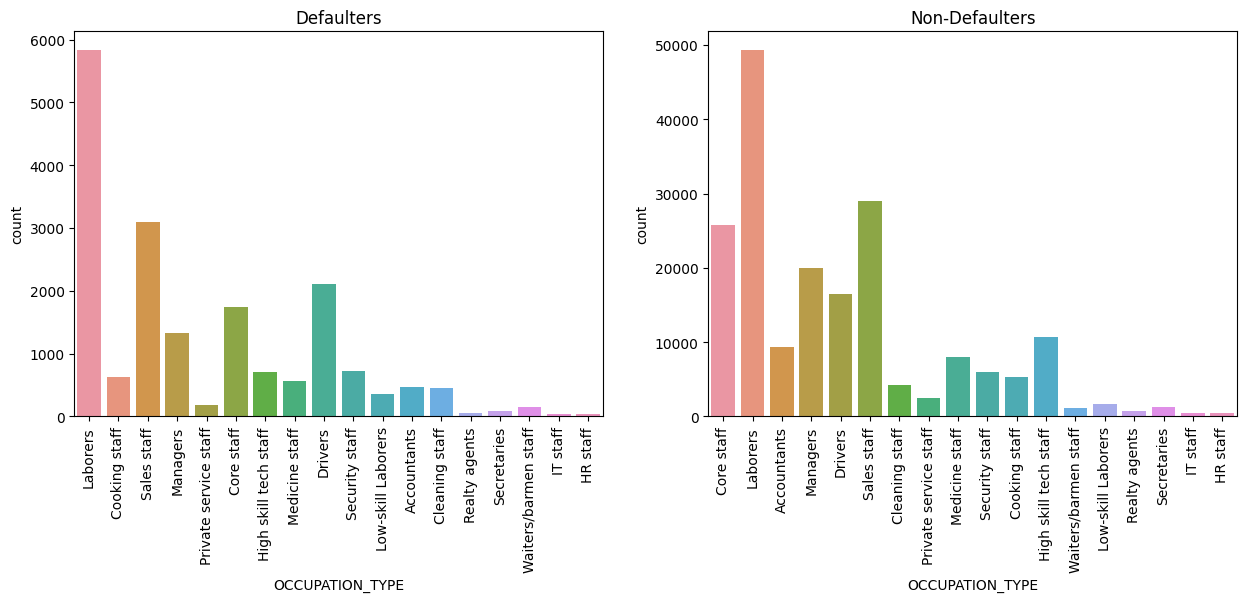

In [ ]:
# Occupation Type
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax = sns.countplot(data=defaulters, x = 'OCCUPATION_TYPE')
plt.title('Defaulters')
ax.set(xlabel='OCCUPATION_TYPE')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.countplot(data=non_defaulters, x = 'OCCUPATION_TYPE')
plt.title('Non-Defaulters')
ax.set(xlabel='OCCUPATION_TYPE')
plt.xticks(rotation=90)
plt.show()

#### Target vs. AMT_ANNUITY

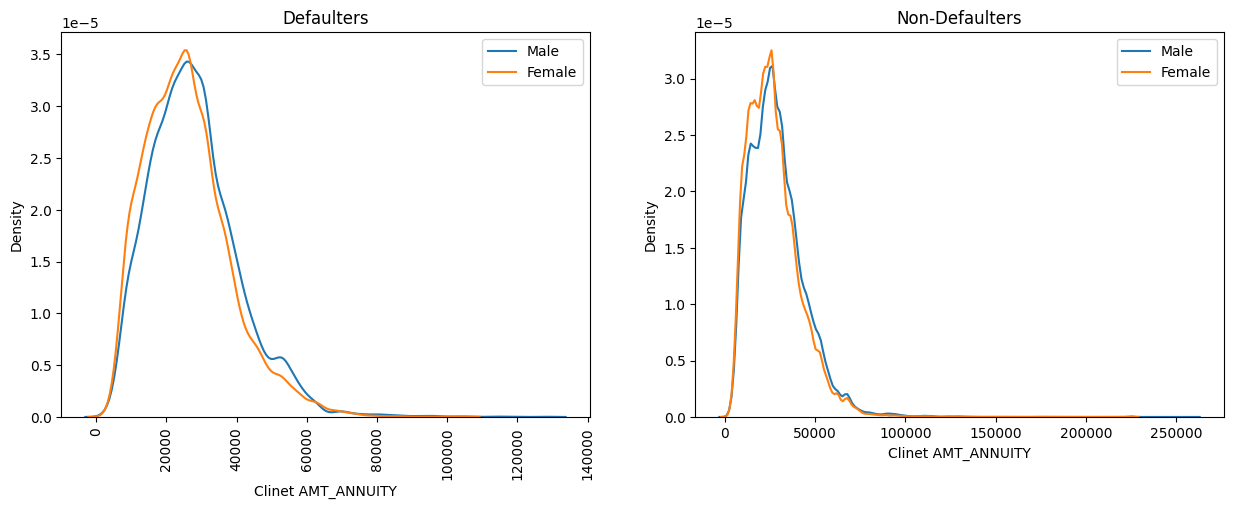

In [ ]:

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax = sns.kdeplot(defaulters[defaulters['CODE_GENDER']=='M']['AMT_ANNUITY'])
plt.title('Defaulters')
plt.xlabel('Clinet AMT_ANNUITY')
plt.xticks(rotation=90)

plt.subplot(1,2,1)
ax = sns.kdeplot(defaulters[defaulters['CODE_GENDER']=='F']['AMT_ANNUITY'])
plt.title('Defaulters')
plt.xlabel('Clinet AMT_ANNUITY')
plt.xticks(rotation=90)
plt.legend(['Male','Female'])

plt.subplot(1,2,2)
ax = sns.kdeplot(non_defaulters[non_defaulters['CODE_GENDER']=='M']['AMT_ANNUITY'])
plt.title('Non-Defaulters')
plt.xlabel('Clinet AMT_ANNUITY')

plt.subplot(1,2,2)
ax = sns.kdeplot(non_defaulters[non_defaulters['CODE_GENDER']=='F']['AMT_ANNUITY'])
plt.title('Non-Defaulters')
plt.xlabel('Clinet AMT_ANNUITY')
plt.legend(['Male','Female'])
plt.show()


#### Target vs. Educational Qualification

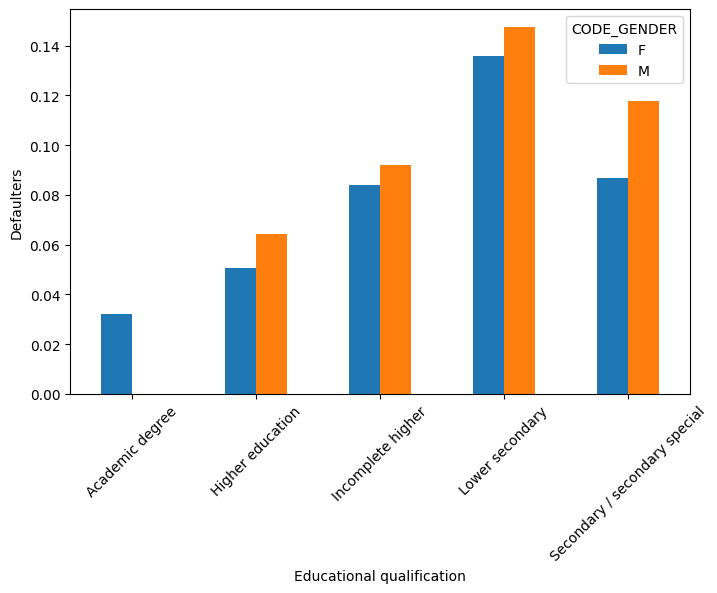

In [ ]:
df_application.pivot_table(values='TARGET',index='NAME_EDUCATION_TYPE',columns='CODE_GENDER',aggfunc='mean').plot.bar(figsize=(8,5),rot=45)
plt.xlabel('Educational qualification')
plt.ylabel('Defaulters')
plt.show()

#### Target vs. YEARS_EMPLOYED and YEARS_ID_PUBLISH

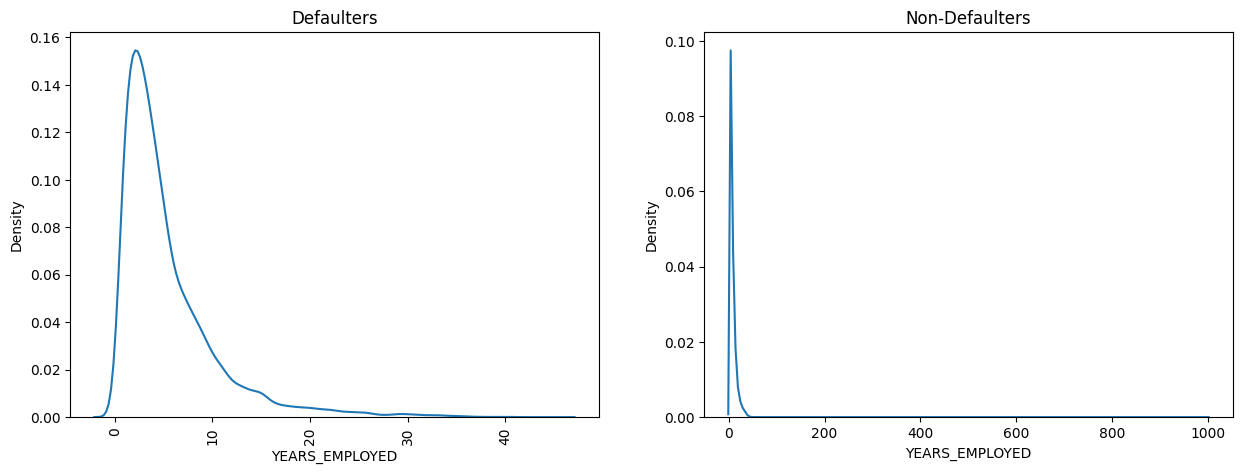

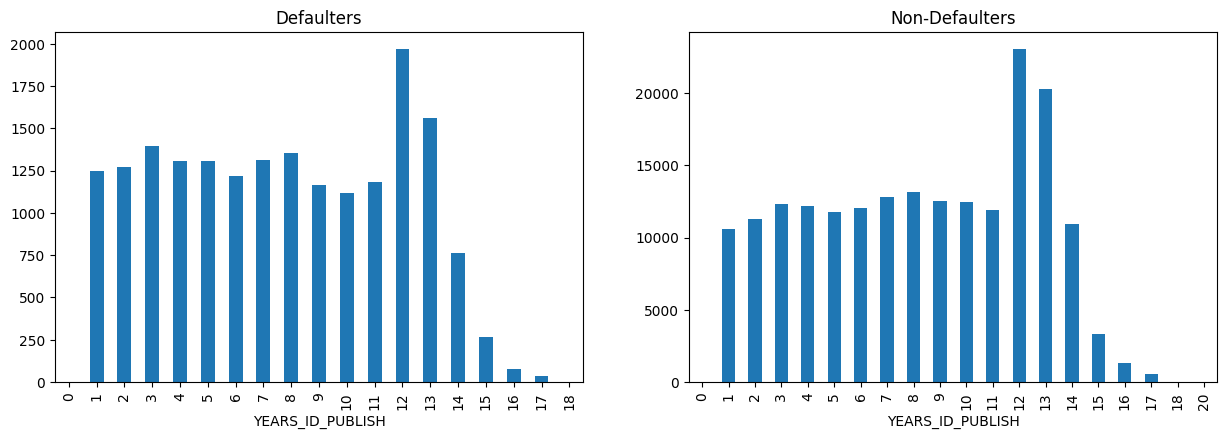

In [ ]:

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
ax = sns.kdeplot(defaulters['YEARS_EMPLOYED'])
plt.title('Defaulters')
plt.xlabel('YEARS_EMPLOYED')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
ax = sns.kdeplot(non_defaulters['YEARS_EMPLOYED'])
plt.title('Non-Defaulters')
plt.xlabel('YEARS_EMPLOYED')
plt.show()

#YEARS_ID_PUBLISH
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
ax = defaulters['YEARS_ID_PUBLISH'].value_counts().sort_index().plot.bar()
plt.title('Defaulters')
plt.xlabel('YEARS_ID_PUBLISH')
plt.xticks(rotation=90)

plt.subplot(2,2,2)
ax = non_defaulters['YEARS_ID_PUBLISH'].value_counts().sort_index().plot.bar()
plt.title('Non-Defaulters')
plt.xlabel('YEARS_ID_PUBLISH')
plt.show()

### Multivariate Analysis

In [ ]:
# Finding correlation for all numerical cols
num_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AGE','REGION_RATING_CLIENT']

# For non-defaulters
non_defaulters_cor = non_defaulters[num_cols]
defaulters_cor = defaulters[num_cols]

In [ ]:
# Corelation matrix
non_defaulters_cor.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,REGION_RATING_CLIENT
AMT_INCOME_TOTAL,1.000000,0.353029,0.430070,0.360687,0.058135,-0.194259
AMT_CREDIT,0.353029,1.000000,0.761880,0.986487,0.157552,-0.103876
AMT_ANNUITY,0.430070,0.761880,1.000000,0.766304,0.098576,-0.128206
AMT_GOODS_PRICE,0.360687,0.986487,0.766304,1.000000,0.151944,-0.104898
AGE,0.058135,0.157552,0.098576,0.151944,1.000000,-0.040043
REGION_RATING_CLIENT,-0.194259,-0.103876,-0.128206,-0.104898,-0.040043,1.000000


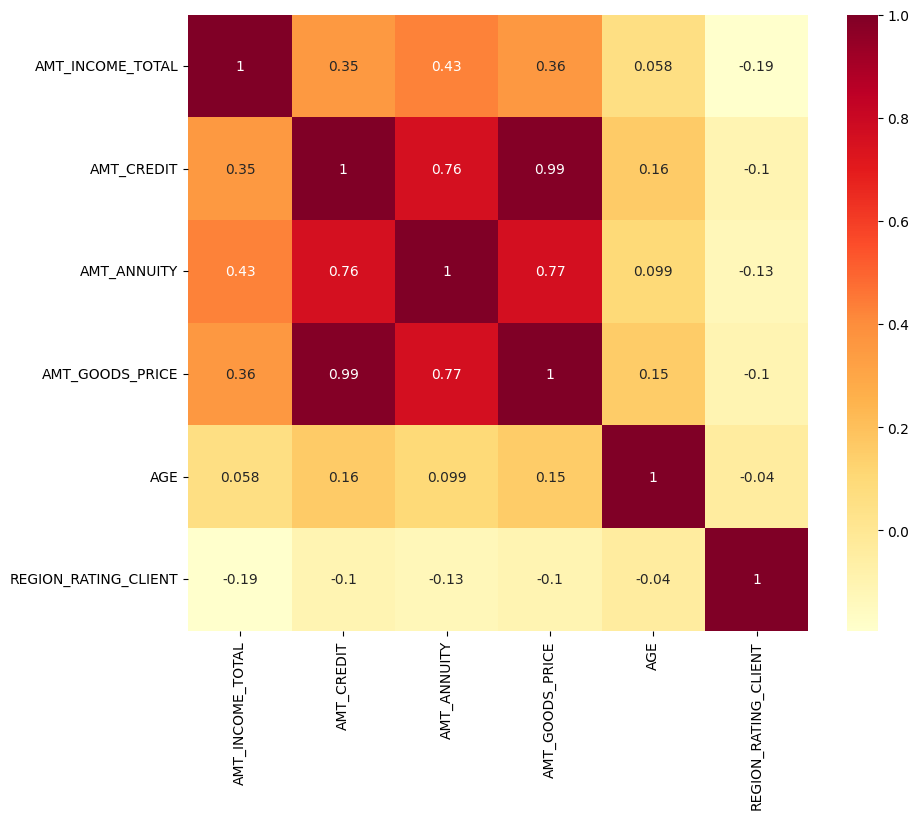

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(non_defaulters_cor.corr() ,cmap="YlOrRd",annot=True)
plt.show()

In [ ]:
# Corelation matrix
defaulters_cor.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AGE,REGION_RATING_CLIENT
AMT_INCOME_TOTAL,1.000000,0.033692,0.039866,0.033211,0.007115,-0.019799
AMT_CREDIT,0.033692,1.000000,0.746905,0.982456,0.187268,-0.059571
AMT_ANNUITY,0.039866,0.746905,1.000000,0.747785,0.092322,-0.072751
AMT_GOODS_PRICE,0.033211,0.982456,0.747785,1.000000,0.183162,-0.066724
AGE,0.007115,0.187268,0.092322,0.183162,1.000000,-0.050724
REGION_RATING_CLIENT,-0.019799,-0.059571,-0.072751,-0.066724,-0.050724,1.000000


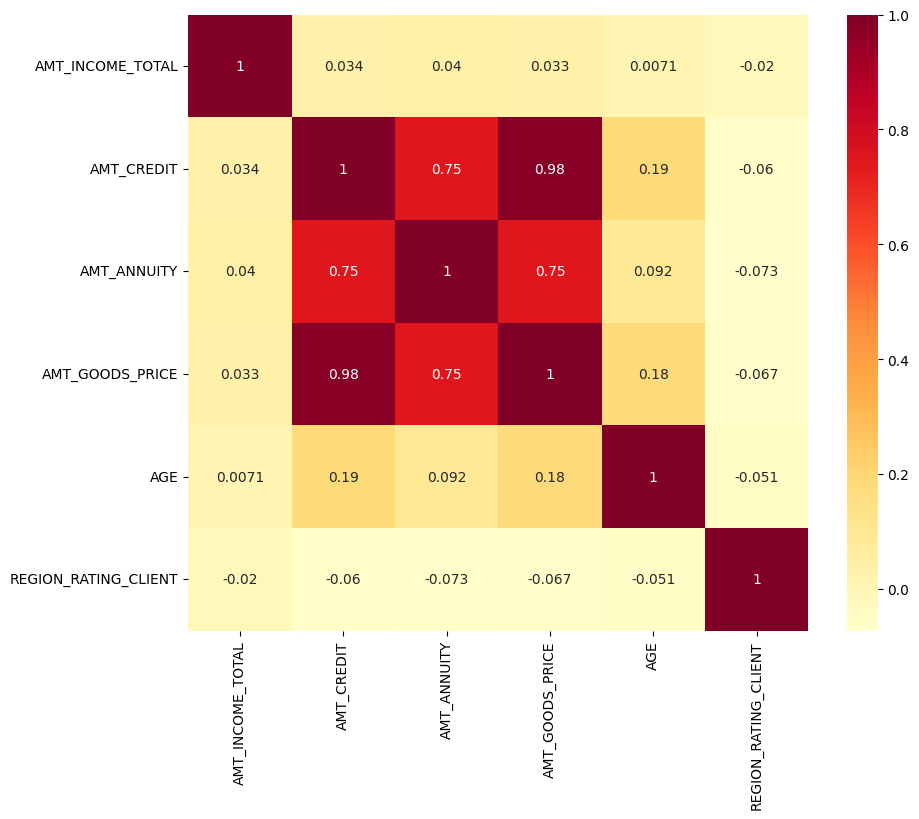

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(defaulters_cor.corr() ,cmap="YlOrRd",annot=True)
plt.show()

AMT Credit vs. other features

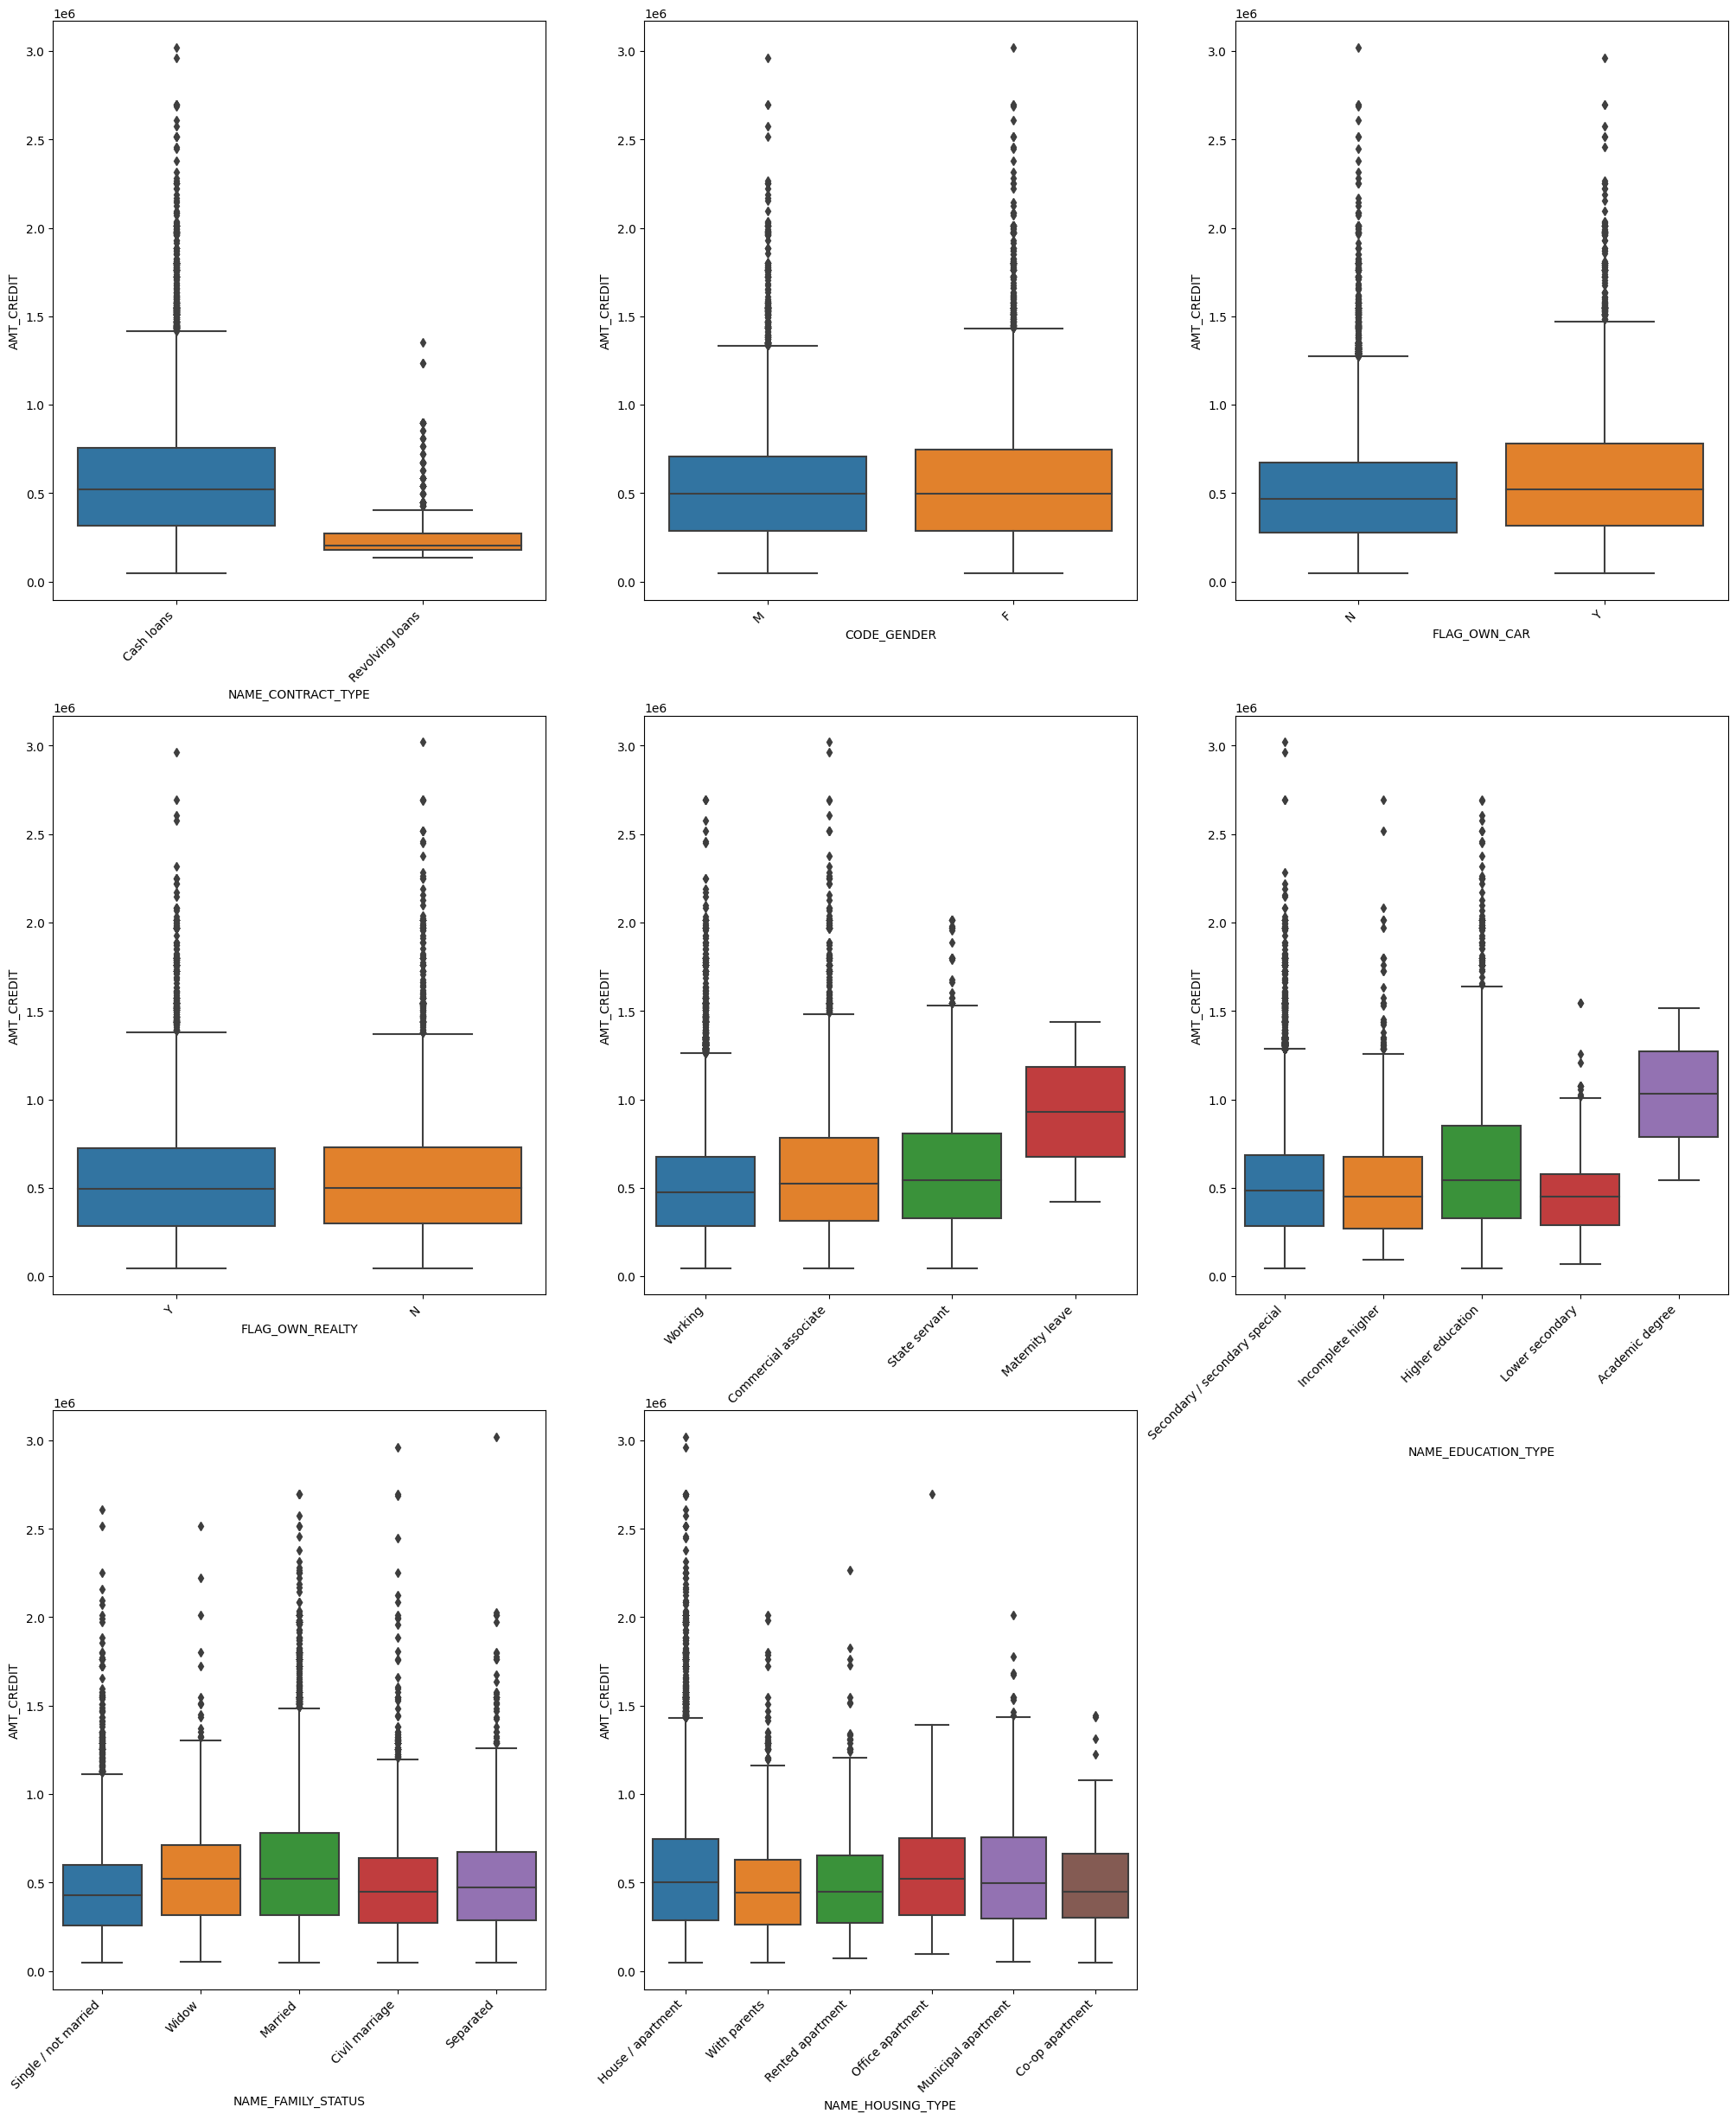

In [ ]:
categories = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
             'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
plt.figure(figsize=(25,40))
k=0
for i in categories:
    k = k+1
    ax = plt.subplot(4,3,k)
    sns.boxplot(x = i, y = 'AMT_CREDIT', data=defaulters)
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment='right')

# Previous Applicants

In [ ]:
df_pr_application.head(10)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,NaN,315000.0,SATURDAY,8,Y,1,NaN,NaN,NaN,Everyday expenses,Approved,-684,Cash through the bank,XAP,Family,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal,Cash X-Sell: low,365243.0,-654.0,-144.0,-144.0,-137.0,1.0
6,2315218,175704,Cash loans,NaN,0.0,0.0,NaN,NaN,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Canceled,-14,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
7,1656711,296299,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Canceled,-21,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
8,2367563,342292,Cash loans,NaN,0.0,0.0,NaN,NaN,MONDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-386,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN
9,2579447,334349,Cash loans,NaN,0.0,0.0,NaN,NaN,SATURDAY,15,Y,1,NaN,NaN,NaN,XNA,Canceled,-57,XNA,XAP,NaN,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA,Cash,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_pr_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
df_pr_application.shape

(1670214, 37)

In [ ]:
# Checking for missing values:
100*df_pr_application.isnull().sum()/df_pr_application.shape[0]

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [ ]:
# Fetching cols more than 45% of data missing

missing_cols = df_pr_application.columns[round(100*df_pr_application.isnull().sum()/df_pr_application.shape[0],2)>40].tolist()

In [ ]:
df_pr_application.drop(missing_cols, axis = 1, inplace=True)

In [ ]:
df_pr_application.shape

(1670214, 26)

In [ ]:
invalid_cols = ['HOUR_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START']

In [ ]:
df_pr_application.drop(invalid_cols, axis=1, inplace=True)

In [ ]:
100*df_pr_application.isnull().sum()/df_pr_application.shape[0]

SK_ID_PREV                 0.000000
SK_ID_CURR                 0.000000
NAME_CONTRACT_TYPE         0.000000
AMT_ANNUITY               22.286665
AMT_APPLICATION            0.000000
AMT_CREDIT                 0.000060
AMT_GOODS_PRICE           23.081773
NAME_CASH_LOAN_PURPOSE     0.000000
NAME_CONTRACT_STATUS       0.000000
DAYS_DECISION              0.000000
NAME_PAYMENT_TYPE          0.000000
CODE_REJECT_REASON         0.000000
NAME_CLIENT_TYPE           0.000000
NAME_GOODS_CATEGORY        0.000000
NAME_PORTFOLIO             0.000000
NAME_PRODUCT_TYPE          0.000000
CHANNEL_TYPE               0.000000
SELLERPLACE_AREA           0.000000
NAME_SELLER_INDUSTRY       0.000000
CNT_PAYMENT               22.286366
NAME_YIELD_GROUP           0.000000
PRODUCT_COMBINATION        0.020716
dtype: float64

In [ ]:
df_pr_application = df_pr_application[df_pr_application['AMT_ANNUITY'].isnull()==False]
df_pr_application = df_pr_application[df_pr_application['AMT_GOODS_PRICE'].isnull()==False]

In [ ]:
# Converting Days_decision to Year

df_pr_application['YEAR_DECISION'] = abs(df_pr_application['DAYS_DECISION']//365)
df_pr_application.drop(columns='DAYS_DECISION',inplace=True)

<ipython-input-103-bd6dcc3bff5c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pr_application['YEAR_DECISION'] = abs(df_pr_application['DAYS_DECISION']//365)


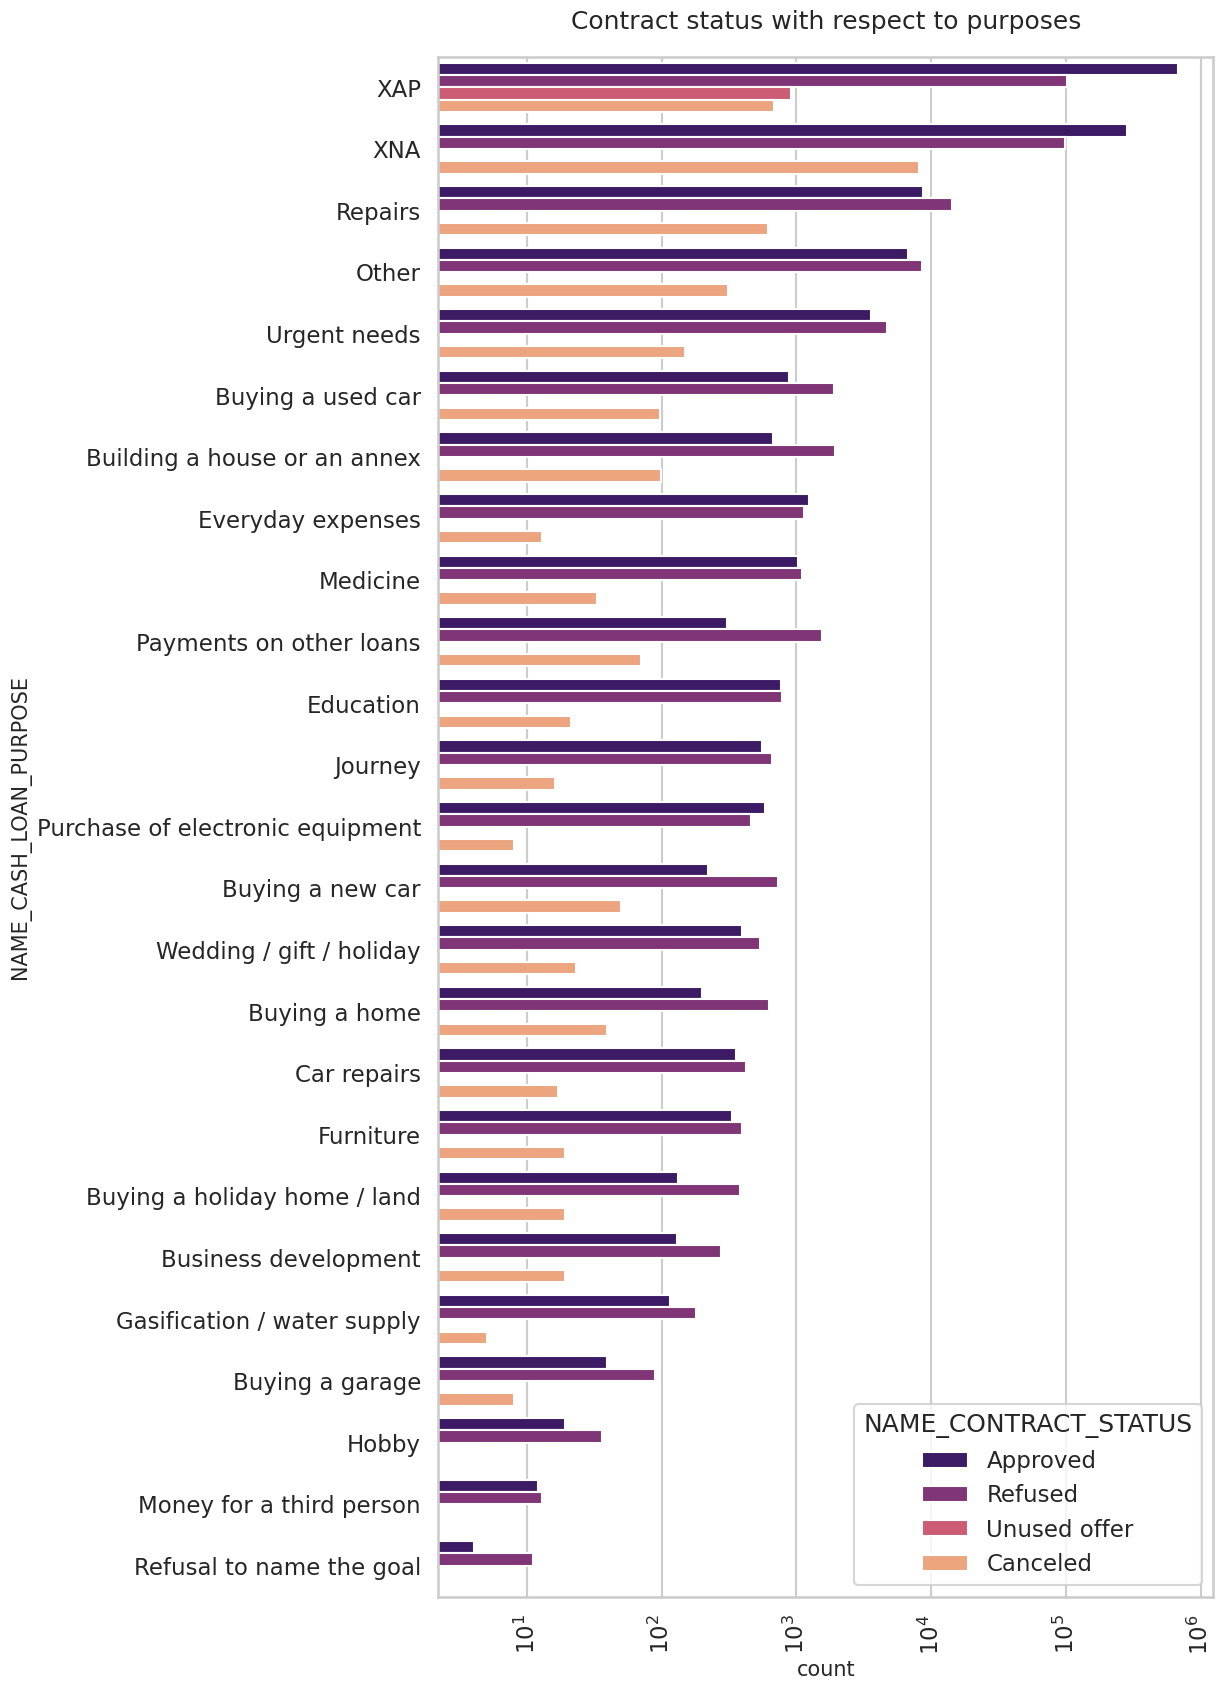

In [ ]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,20))
plt.rcParams["axes.labelsize"] = 15
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titlepad'] = 20
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Contract status with respect to purposes')
ax = sns.countplot(data = df_pr_application, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=df_pr_application['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

Here we can observe fields like XAP and XNA, which we will drop

In [ ]:
df_pr_application=df_pr_application.drop(df_pr_application[df_pr_application['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_pr_application=df_pr_application.drop(df_pr_application[df_pr_application['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

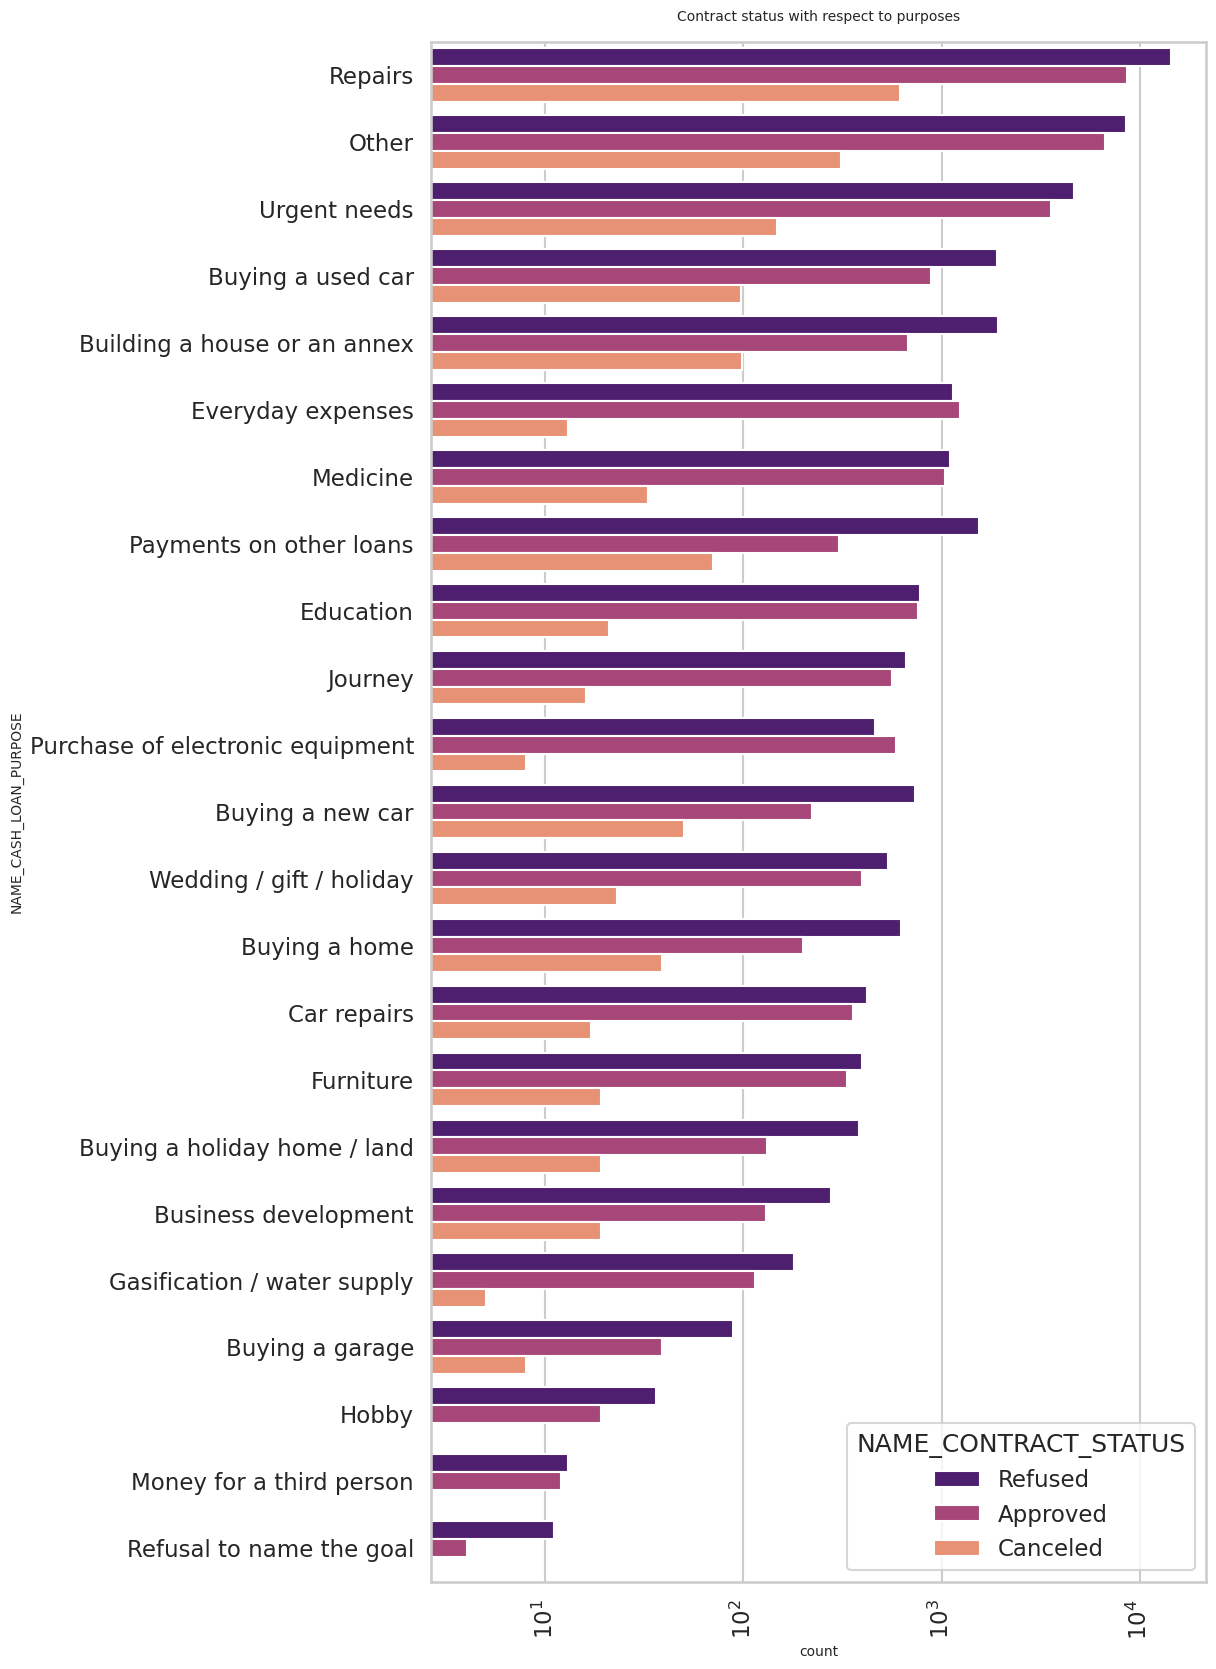

In [ ]:
sns.set_style('whitegrid')
sns.set_context('talk')

plt.figure(figsize=(10,20))
plt.rcParams["axes.labelsize"] = 10
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['axes.titlepad'] = 15
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Contract status with respect to purposes')
ax = sns.countplot(data = df_pr_application, y= 'NAME_CASH_LOAN_PURPOSE',
                   order=df_pr_application['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')

Points to be concluded from above plot:

* Most rejection of loans came from purpose 'repairs'.
* For education purposes we have equal number of approves and rejection
* Paying other loans and buying a new car is having significant higher rejection than approves.

### Multivariate Analysis

In [ ]:
corr_cols = ['AMT_APPLICATION','AMT_CREDIT','AMT_ANNUITY','CNT_PAYMENT','YEAR_DECISION']

In [ ]:
corr_cols_df = df_pr_application[corr_cols]

In [ ]:
corr_cols_df.corr()

,AMT_APPLICATION,AMT_CREDIT,AMT_ANNUITY,CNT_PAYMENT,YEAR_DECISION
AMT_APPLICATION,1.000000,0.994927,0.784131,0.654998,-0.202863
AMT_CREDIT,0.994927,1.000000,0.780327,0.677761,-0.210332
AMT_ANNUITY,0.784131,0.780327,1.000000,0.266100,-0.125480
CNT_PAYMENT,0.654998,0.677761,0.266100,1.000000,-0.277907
YEAR_DECISION,-0.202863,-0.210332,-0.125480,-0.277907,1.000000


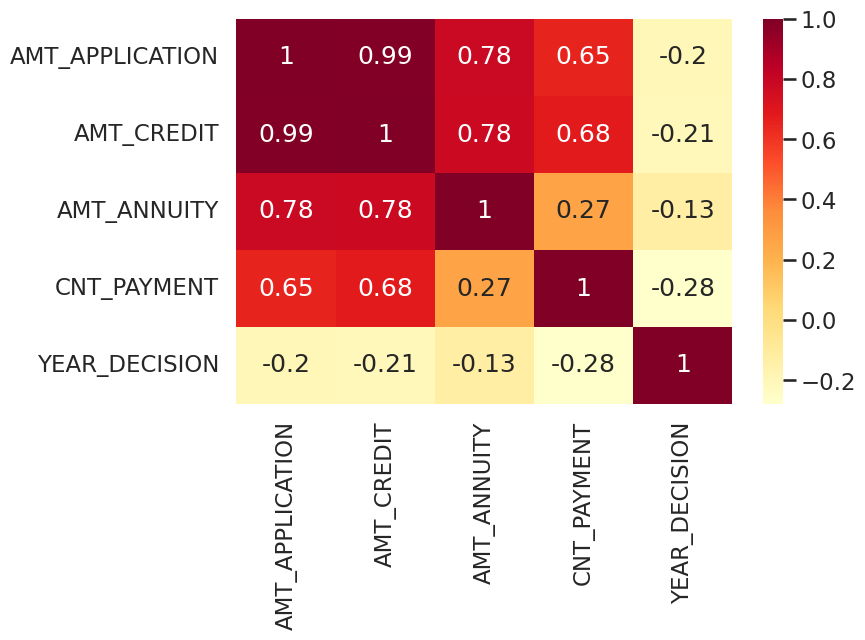

In [ ]:
plt.figure(figsize=(8,5))
sns.heatmap(corr_cols_df.corr(),cmap="YlOrRd",annot=True)
plt.show()